##### This Dataset is made up of around 33,000 patients who answered a survey about their health all participants suffer from either Crohn’s or Ulcerative colitis disease (both IBD diseases). 
###### - Some Explanation of the data:
- gender: 1 = male, 2 = female .
- diagnosis: type of IBD affected by: 1 = Crohn's, 2 = UC, 3 = IBD - type unspecified (IBDU), 4 = other .
- hosp_admin: Hospital for treatment, 1 = yes, 2 = no, 3 = not known .
- bmi: if BMI less than 18.5; underweight, BMI between 18.5 and 24.9; healthy, BMI between 25 and 29.9; over weight, BMI over 40; obese . 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('health survey.csv')
data.head()

,pt_ID,gender,diagnosis,hosp_admin,age_band_jan1,bmi,smoker,past_smoker,diet_preference,cancer,heart_disease
0,0,2.0,2.0,2.0,55-59,25.2,No,Yes,No_pref,NaN,NaN
1,1,1.0,1.0,2.0,50-54,31.2,No,Yes,No_pref,NaN,NaN
2,2,1.0,2.0,1.0,30-34,28.4,No,Yes,No_pref,NaN,NaN
3,3,2.0,1.0,2.0,50-54,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.0,2.0,2.0,50-54,28.6,No,No,No_pref,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33699 entries, 0 to 33698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            33699 non-null  int64  
 1   gender           33694 non-null  float64
 2   diagnosis        33264 non-null  float64
 3   hosp_admin       32573 non-null  float64
 4   age_band_jan1    33265 non-null  object 
 5   bmi              20403 non-null  float64
 6   smoker           22210 non-null  object 
 7   past_smoker      19072 non-null  object 
 8   diet_preference  22159 non-null  object 
 9   cancer           1481 non-null   object 
 10  heart_disease    1378 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.8+ MB


###### Exploring the relation between BMI and IBD

In [9]:
# First we're going to drop NaN values in both 'diagnosis' & 'bmi'
df1 = data.dropna(subset=['diagnosis','bmi']).copy()

# we'll categorize the 'bmi' column
bins = [4.5, 18.5, 25, 30, 100]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df1['bmi_category'] = pd.cut(df1.bmi, bins=bins, labels=labels)

# we'll extract the four bmi categories with regard to the diagnosis column.
underweight = np.array(df1[df1.bmi_category=='Underweight'].groupby('diagnosis')['bmi'].count())
healthy = np.array(df1[df1.bmi_category=='Healthy'].groupby('diagnosis')['bmi'].count())
overweight = np.array(df1[df1.bmi_category=='Overweight'].groupby('diagnosis')['bmi'].count())
obese = np.array(df1[df1.bmi_category=='Obese'].groupby('diagnosis')['bmi'].count())

underweight = np.append(underweight,[0]) #adding zero as value for 'other' in IBD, not the cleanest way tho.


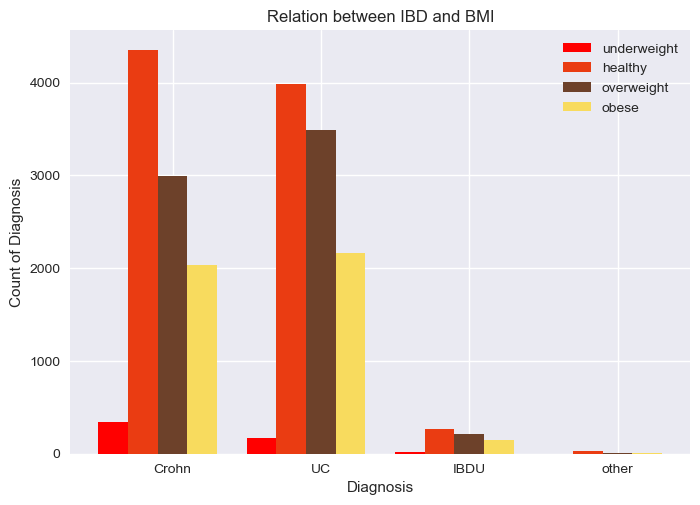

In [44]:
x_indexes = np.arange(len(labels))
width = 0.2

plt.bar(x_indexes - 2*width, underweight, width=width, label='underweight', color='#ff0000' )
plt.bar(x_indexes - width, healthy, width=width, label='healthy', color = '#ea3c12')
plt.bar(x_indexes, overweight, width=width, label='overweight', color = '#6d412a')
plt.bar(x_indexes + width, obese, width=width, label='obese', color = '#f8db5e')

plt.xticks(ticks=x_indexes, labels=['Crohn', 'UC','IBDU','other'])
plt.xlabel('Diagnosis')
plt.ylabel('Count of Diagnosis')
plt.title('Relation between IBD and BMI')

plt.legend()
plt.style.use('_classic_test_patch')
plt.show()
# print(plt.style.available)


###### Eploring the relation between smoking and IBD
- First, for past smokers.

In [15]:
df2 = data.dropna(subset=['diagnosis','past_smoker']).copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18917 entries, 0 to 33687
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            18917 non-null  int64  
 1   gender           18917 non-null  float64
 2   diagnosis        18917 non-null  float64
 3   hosp_admin       18549 non-null  float64
 4   age_band_jan1    18917 non-null  object 
 5   bmi              17258 non-null  float64
 6   smoker           18789 non-null  object 
 7   past_smoker      18917 non-null  object 
 8   diet_preference  18625 non-null  object 
 9   cancer           1279 non-null   object 
 10  heart_disease    1203 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB


In [26]:
df2.drop(df2[df2['past_smoker']=="Don't know"],axis=1)
unknown_smokers = df2[df2['past_smoker'] == "Don't know"].index
df2.drop(unknown_smokers,inplace=True) #Dropping "Don't know" values in smoker (8 values)

# creating pivot table between diagnosis, past_smoke and the values are the count of pt_ID
pv=df2.pivot_table(values='pt_ID', index='diagnosis', columns='past_smoker',aggfunc='count')
pv

past_smoker,No,Yes
diagnosis,,
1.0,4464,4209
2.0,4497,5106
3.0,300,292
4.0,17,24


Text(0, 0.5, 'Count of Diagnosis')

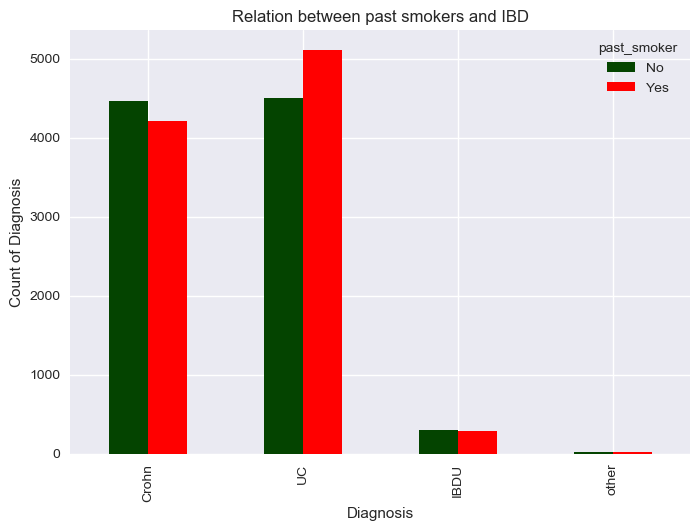

In [48]:
colors = ['#044400','#ff0000']
pv.plot(kind='bar',color=colors)
x_indexes = np.arange(len(pv.index.to_list()))
plt.xticks(ticks=x_indexes, labels=['Crohn', 'UC','IBDU','other']);

plt.title('Relation between past smokers and IBD')
plt.xlabel('Diagnosis')
plt.ylabel('Count of Diagnosis')

- second, for any smoker either currently or in the past.

In [49]:
df3 = data.dropna(subset=['diagnosis','smoker','past_smoker']).copy()
df3['anytime_smoker'] = np.where((df3['smoker'] == 'Yes') | (df3['past_smoker'] == 'Yes') , 'yes', 'No')
df3.head()

,pt_ID,gender,diagnosis,hosp_admin,age_band_jan1,bmi,smoker,past_smoker,diet_preference,cancer,heart_disease,anytime_smoker
0,0,2.0,2.0,2.0,55-59,25.2,No,Yes,No_pref,NaN,NaN,yes
1,1,1.0,1.0,2.0,50-54,31.2,No,Yes,No_pref,NaN,NaN,yes
2,2,1.0,2.0,1.0,30-34,28.4,No,Yes,No_pref,NaN,NaN,yes
4,4,2.0,2.0,2.0,50-54,28.6,No,No,No_pref,NaN,NaN,No
5,5,1.0,1.0,1.0,60-64,22.8,No,Yes,No_pref,NaN,NaN,yes


In [50]:
pv2 = df3.pivot_table(values='pt_ID', index='diagnosis', columns='anytime_smoker', aggfunc='count')
pv2

anytime_smoker,No,yes
diagnosis,,
1.0,4448,4176
2.0,4473,5062
3.0,299,290
4.0,17,24


Text(0, 0.5, 'count of Diagnosis')

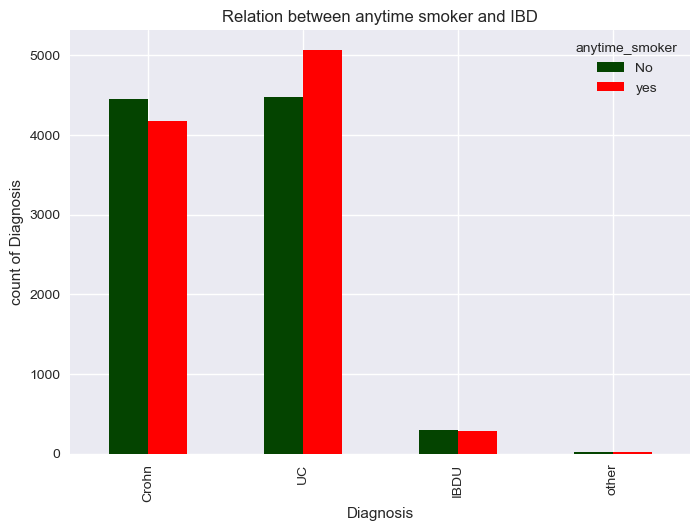

In [54]:
colors = ['#044400','#ff0000']
pv2.plot(kind='bar',color=colors)
x_indexes = np.arange(len(pv2.index.to_list()))
plt.xticks(ticks=x_indexes, labels=['Crohn', 'UC','IBDU','other']);

plt.title('Relation between anytime smoker and IBD')
plt.xlabel('Diagnosis')
plt.ylabel('count of Diagnosis')

###### Exploring the relation between cancer and IBD

In [55]:
data.head()

,pt_ID,gender,diagnosis,hosp_admin,age_band_jan1,bmi,smoker,past_smoker,diet_preference,cancer,heart_disease
0,0,2.0,2.0,2.0,55-59,25.2,No,Yes,No_pref,NaN,NaN
1,1,1.0,1.0,2.0,50-54,31.2,No,Yes,No_pref,NaN,NaN
2,2,1.0,2.0,1.0,30-34,28.4,No,Yes,No_pref,NaN,NaN
3,3,2.0,1.0,2.0,50-54,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.0,2.0,2.0,50-54,28.6,No,No,No_pref,NaN,NaN


In [56]:
df4 = data.dropna(subset=['diagnosis','cancer']).copy()
df4.cancer.value_counts()

Yes    1471
Name: cancer, dtype: int64

Text(0, 0.5, 'count of Diagnosis')

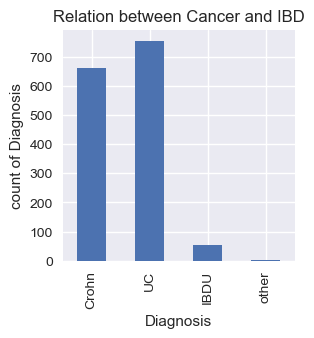

In [60]:
df4.groupby(['diagnosis'])['cancer'].count().plot(kind='bar',figsize=(3,3));

plt.xticks(ticks=[0,1,2,3], labels=['Crohn', 'UC','IBDU','other']);

plt.title('Relation between Cancer and IBD')
plt.xlabel('Diagnosis')
plt.ylabel('count of Diagnosis')

###### Exploring the relation between heart disease and IBD

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33699 entries, 0 to 33698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            33699 non-null  int64  
 1   gender           33694 non-null  float64
 2   diagnosis        33264 non-null  float64
 3   hosp_admin       32573 non-null  float64
 4   age_band_jan1    33265 non-null  object 
 5   bmi              20403 non-null  float64
 6   smoker           22210 non-null  object 
 7   past_smoker      19072 non-null  object 
 8   diet_preference  22159 non-null  object 
 9   cancer           1481 non-null   object 
 10  heart_disease    1378 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.8+ MB


In [65]:
#  we only have 1481 values for heart_disease !
df_heart = data.dropna(subset=['diagnosis','heart_disease']).copy()
df_heart.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 10 to 33548
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            1366 non-null   int64  
 1   gender           1366 non-null   float64
 2   diagnosis        1366 non-null   float64
 3   hosp_admin       1342 non-null   float64
 4   age_band_jan1    1366 non-null   object 
 5   bmi              1223 non-null   float64
 6   smoker           1338 non-null   object 
 7   past_smoker      1203 non-null   object 
 8   diet_preference  1333 non-null   object 
 9   cancer           200 non-null    object 
 10  heart_disease    1366 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 128.1+ KB


In [66]:
df_heart.heart_disease.value_counts()

Yes    1366
Name: heart_disease, dtype: int64

Text(0, 0.5, 'count of Diagnosis')

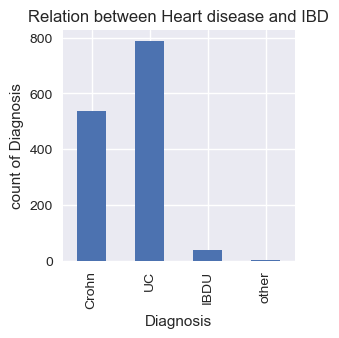

In [67]:
df_heart.groupby(['diagnosis'])['heart_disease'].count().plot(kind='bar',figsize=(3,3));

plt.xticks(ticks=[0,1,2,3], labels=['Crohn', 'UC','IBDU','other']);
plt.title('Relation between Heart disease and IBD')
plt.xlabel('Diagnosis')
plt.ylabel('count of Diagnosis')

###### Exploring the relation between age and IBD

In [68]:
data.age_band_jan1.isnull().sum()

434

In [69]:
df5 = data.dropna(subset=['diagnosis','age_band_jan1']).copy()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32873 entries, 0 to 33687
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            32873 non-null  int64  
 1   gender           32873 non-null  float64
 2   diagnosis        32873 non-null  float64
 3   hosp_admin       32195 non-null  float64
 4   age_band_jan1    32873 non-null  object 
 5   bmi              20224 non-null  float64
 6   smoker           22026 non-null  object 
 7   past_smoker      18917 non-null  object 
 8   diet_preference  21974 non-null  object 
 9   cancer           1471 non-null   object 
 10  heart_disease    1366 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 3.0+ MB


In [70]:
df5.age_band_jan1.value_counts(ascending=True)

15-19     212
20-24    1716
65-69    2292
60-64    2668
25-29    2822
45-49    3003
40-44    3035
55-59    3064
50-54    3100
30-34    3204
35-39    3296
>=70     4461
Name: age_band_jan1, dtype: int64

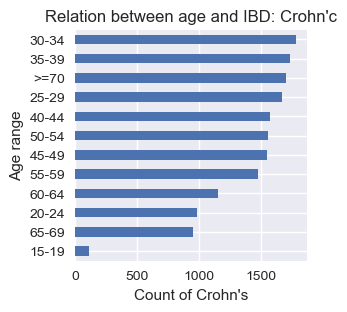

In [78]:
df5[df5['diagnosis']==1].groupby(['age_band_jan1'])['pt_ID'].count().sort_values(ascending=True).plot(kind='barh',
                                                                                                      figsize=(3,3));
#  1 = Crohn's, 2 = UC, 3 = IBD - type unspecified (IBDU), 4 = other
plt.title("Relation between age and IBD: Crohn'c");
plt.xlabel("Count of Crohn's");
plt.ylabel('Age range');

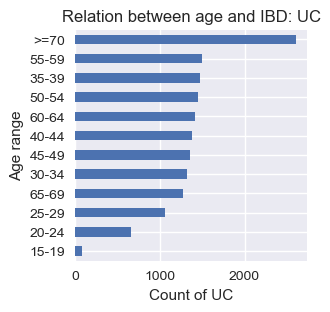

In [79]:
df5[df5['diagnosis']==2].groupby(['age_band_jan1'])['pt_ID'].count().sort_values(ascending=True).plot(kind='barh',
                                                                                                      figsize=(3,3));

plt.title("Relation between age and IBD: UC");
plt.xlabel("Count of UC");
plt.ylabel('Age range');

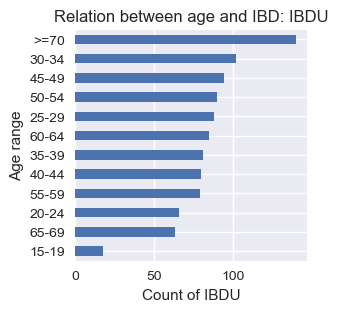

In [81]:
df5[df5['diagnosis']==3].groupby(['age_band_jan1'])['pt_ID'].count().sort_values(ascending=True).plot(kind='barh',
                                                                                                      figsize=(3,3));
plt.title("Relation between age and IBD: IBDU");
plt.xlabel("Count of IBDU");
plt.ylabel('Age range');

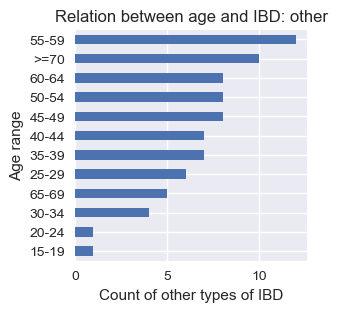

In [82]:
df5[df5['diagnosis']==4].groupby(['age_band_jan1'])['pt_ID'].count().sort_values(ascending=True).plot(kind='barh',
                                                                                                      figsize=(3,3));

plt.title("Relation between age and IBD: other");
plt.xlabel("Count of other types of IBD");
plt.ylabel('Age range');

###### Exploring the relation between gender and IBD

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33699 entries, 0 to 33698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            33699 non-null  int64  
 1   gender           33694 non-null  float64
 2   diagnosis        33264 non-null  float64
 3   hosp_admin       32573 non-null  float64
 4   age_band_jan1    33265 non-null  object 
 5   bmi              20403 non-null  float64
 6   smoker           22210 non-null  object 
 7   past_smoker      19072 non-null  object 
 8   diet_preference  22159 non-null  object 
 9   cancer           1481 non-null   object 
 10  heart_disease    1378 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.8+ MB


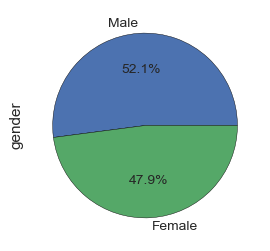

In [84]:
df_gender = data.dropna(subset=['diagnosis','gender']).copy()
df_gender.gender.value_counts().plot(kind='pie',labels=['Male','Female'],figsize=(3,3),autopct='%1.1f%%',
                                     wedgeprops={'edgecolor':'black'});

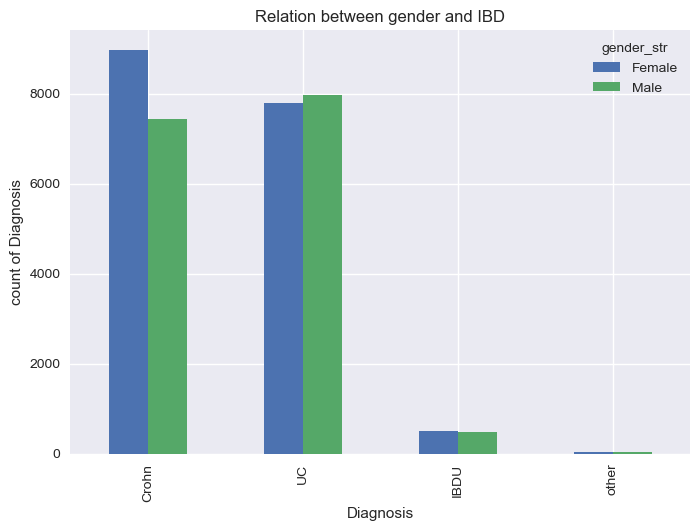

In [91]:
df_gender['gender_str'] = df_gender['gender'].replace({1:'Male', 2:'Female'})

pv3 = df_gender.pivot_table(values='pt_ID', index='diagnosis', columns='gender_str', aggfunc='count')

x_indexes = np.arange(len(pv3.index.to_list()))
pv3.plot(kind='bar');

plt.xticks(ticks=x_indexes, labels=['Crohn', 'UC','IBDU','other']);
plt.title('Relation between gender and IBD');
plt.xlabel('Diagnosis');
plt.ylabel('count of Diagnosis');